In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import random

batch_size = 64
num_epochs = 10

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


In [2]:
class CNNNet(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [3]:
model = CNNNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [4]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        val_loss = 0
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        val_accuracy = 100 * correct / total
        val_loss /= len(test_loader)
        print('Epoch [{}/{}], Validation Loss: {:.4f}, Validation Accuracy: {:.2f}%'.format(epoch + 1, num_epochs, val_loss, val_accuracy))

    model.train()

Epoch [1/10], Step [100/938], Loss: 0.3228
Epoch [1/10], Step [200/938], Loss: 0.2532
Epoch [1/10], Step [300/938], Loss: 0.3047
Epoch [1/10], Step [400/938], Loss: 0.1252
Epoch [1/10], Step [500/938], Loss: 0.0696
Epoch [1/10], Step [600/938], Loss: 0.2188
Epoch [1/10], Step [700/938], Loss: 0.1911
Epoch [1/10], Step [800/938], Loss: 0.0737
Epoch [1/10], Step [900/938], Loss: 0.2830
Epoch [1/10], Validation Loss: 0.0510, Validation Accuracy: 98.31%
Epoch [2/10], Step [100/938], Loss: 0.2112
Epoch [2/10], Step [200/938], Loss: 0.0447
Epoch [2/10], Step [300/938], Loss: 0.0893
Epoch [2/10], Step [400/938], Loss: 0.0598
Epoch [2/10], Step [500/938], Loss: 0.0397
Epoch [2/10], Step [600/938], Loss: 0.0942
Epoch [2/10], Step [700/938], Loss: 0.0681
Epoch [2/10], Step [800/938], Loss: 0.0836
Epoch [2/10], Step [900/938], Loss: 0.0524
Epoch [2/10], Validation Loss: 0.0348, Validation Accuracy: 98.86%
Epoch [3/10], Step [100/938], Loss: 0.0826
Epoch [3/10], Step [200/938], Loss: 0.0464
Epoch 

In [5]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 99.4 %


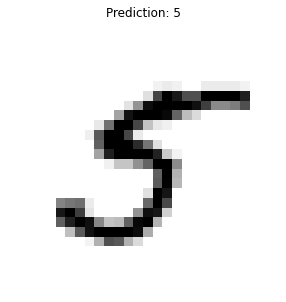

In [8]:
import matplotlib.pyplot as plt
image, label = test_dataset[random.randint(0, len(test_dataset))]
model.eval()
with torch.no_grad():
    output = model(image.unsqueeze(0))
    _, predicted = torch.max(output.data, 1)

plt.figure(figsize=(5,5))
plt.imshow(image.squeeze(), cmap='gray_r')
plt.title(f"Prediction: {predicted.item()}")
plt.axis('off')
plt.show()

In [ ]:
s